### Importação dos dados



In [21]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


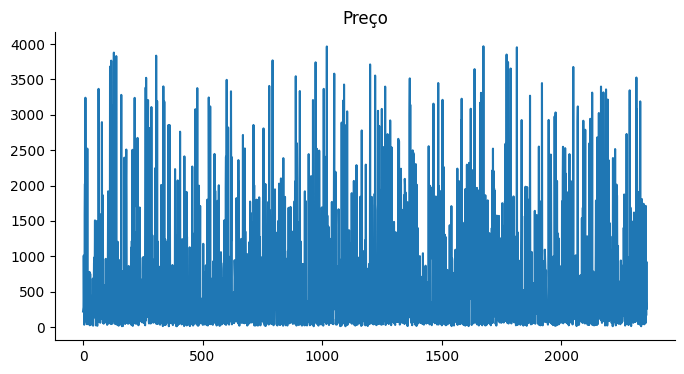

In [8]:
# @title Preço

from matplotlib import pyplot as plt
loja['Preço'].plot(kind='line', figsize=(8, 4), title='Preço')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=loja)

https://docs.google.com/spreadsheets/d/1Yy1Xi-Jkgev-_1IqErClKYF0HJ45a5VJSdY7Jzm4gmw/edit#gid=0


#1. Análise do faturamento


In [23]:
import pandas as pd
import plotly.express as px

# Calcular faturamento de cada loja
faturamento_total_loja1 = loja["Preço"].sum()
faturamento_total_loja2 = loja2["Preço"].sum()
faturamento_total_loja3 = loja3["Preço"].sum()
faturamento_total_loja4 = loja4["Preço"].sum()

# Exibir resultados
print(f"Faturamento Loja 1: R$ {faturamento_total_loja1:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_total_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_total_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_total_loja4:,.2f}")



Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


In [25]:
# 2. Montar DataFrame para o gráfico ---
df_faturamento = {
    "Loja": ["Loja 1", "Loja 2", "Loja 3", "Loja 4"],
    "Faturamento": [
        faturamento_total_loja1,
        faturamento_total_loja2,
        faturamento_total_loja3,
        faturamento_total_loja4
    ]
}
df = pd.DataFrame(df_faturamento)

# 3. Plotar com Plotly Express ---
fig = px.bar(
    data_frame=df,
    x="Loja",
    y="Faturamento",
    title="Faturamento por Loja",
    color="Loja",
    text="Faturamento"
)

# Ajustes de formatação
fig.update_traces(
    texttemplate='R$ %{text:,.2f}',
    textposition='outside'
)
fig.update_layout(
    yaxis_title="Faturamento (R$)",
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()

# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
